# Learning objectives

We will learn the basic lingo around data and specifically talk about two types of data: quantitative and qualitative.

We then go over how to succinctly describe both types of data with summary statistics. 

While basic, this lesson will give us a common vocabulary that we will use for the rest of the class.

# How We begin

We begin the journey into data science with a single assumption, we have data. While this may sound like a must, it is actually not always the case. Sometimes you will begin without any data and you will be asked to rectify that problem in any number of ways: collecting it, purchasing, scraping, etc. 

So while the first stage of data science might actually be collecting data, this is not where **we** will start. First we will get a feel for data. Try to understand what we can do with it and what is a 'good dataset'. Then hopefully that first problem will work itself out. 

## The data assumption

So as you will come to expect, let's start off by listing the assumptions we have made (and as you will further come to expect we will do it in graph form):

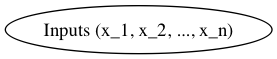

In [1]:
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

G = nx.DiGraph()
G.add_node('Inputs (x_1, x_2, ..., x_n)')
draw(G)

Just one node/bubble (we will get more don't worry). And as you will see in a moment, there is some that we can do by only relying on this assumption, but not much. 

I will call this node the input node, it's basically the dataset. Notice that our dataset contains multiple points (x_1, x_2, ...).

We start off by assuming we have a series of data points. We will focus on describing these data points today.

## To the data

So we are not just in the realm of the theoretical, let's "get" some actual data.

In [2]:
data = {
    'quantitative1': [1, 4, 6, 10, 15, 16],
    'quantitative2': [4, 6, 12, 13, 16, 19],
    'qualitative': ['red', 'blue', 'red', 'blue', 'yellow', 'red']
}

In [4]:
import pandas as pd

# and now let's put that data in a DataFrame (python's Excel spreadsheet)
pd.DataFrame(data)

,qualitative,quantitative1,quantitative2
0,red,1,4
1,blue,4,6
2,red,6,12
3,blue,10,13
4,yellow,15,16
5,red,16,19


There we have it. Notice that my data has multiple columns (quant and qual) and rows (6 rows to be exact). The columns can sometimes go by other names: dimensions, features, covariates, m, etc. and the rows can go by other names too: samples, data points, n, etc.

I will generally call the columns features and the rows data points.



## Quant or Qual?

And notice that they come in two flavors:

1. Quantitative: something that you can describe with a number (speed, location, size, etc.)
2. Qualitative: something that is hard to describe with an exact number (language, make of a car, etc.)

You will also notice very fine lines. The definitions can be crossed pretty easily. But perhaps the best question you can ask about a particular feature to determine if it is a quantitative or a qualitative feature is: can I average the feature?

In this respect we can see how things that you classically thought were qualitative can become quantitative. For example, this might seem plausible:

```
ave(depressed , content) = melancholy
```

Then maybe instead of using qualitative descriptions, you should be using a happiness score/index. But then you can look at this puzzling question:
```
ave(confused , giddy) = ?
```

Perhaps you should just be using a qualitative feature at this point. 

But now we are well on our way to describing data. 

1. We can talk about how many features and data points we have. 
2. And we can talk about whether the features are quantitative or qualitative. 

But there is so much more that we can do!

## Describing qualitative features

The classic way that we can describe features (other than what we alluded to above) is with summary statistics a description of the data using a single number. An example would be the average of a particular column.

A summary statistic is innately a quantitative one (it is a number). Because qualitative features are non-quantitative (are not numbers themselves), there are only a few summary statistics (numbers describing them) that make sense. 

One of them is the **count** of each term. We can do this using the python library pandas below:

In [5]:
df = pd.DataFrame(data)

df.groupby('qualitative').qualitative.count()

qualitative
blue      2
red       3
yellow    1
Name: qualitative, dtype: int64

In such a way we can get a sense of what types of data we have and how many of each. We can easily get the **mode** (or the most common type) from this analysis as well.

As a final note, some qualitative data can be ordered, and in this case you will be able to find the **median** (the center) of that data as well.

## Describing quantiative features

Now we are getting into the good stuff. We are looking to describe quantitative features with quantitative statistics. Remember that we are doing the impossible. We are taking what could be millions of data points and summarizing them with a single number, so these had better be pretty important numbers! And it turns out they are. They fall into four categories:

1. **Center statistics**. Things that tell us where the center or majority of the data lives. Eg. the mean, median and mode (plus a ton of other arcane measures, geometric mean, winsorized mean, etc.)
2. **Spread**. Measures how far away from the center is your data. Eg. standard deviation and variance (plus again a ton of other measures like the absolute deviation, range, gini coefficient, etc.)
3. **Dependence**. How related are two factors. Eg. correlation (Pearson's specifically)
4. **Shape**. What is the shape of the distribution of the data (more on this next time)


These are the most important summary statistics and if you know them about your data, you can generally infer a ton about it. But don't be fooled! You might know less than you think! Just knowing the mean of a data set does not tell you too much about it. The prime example is a bimodal distribution (google it).

<blockquote>
  A question to ask yourself is: why do we care about any of these measures
</blockquote>

Below is how we get the center and spead statistics:

In [6]:
print df.quantitative1.mean()
# standard deviation
print df.quantitative1.std()
print df.quantitative1.median()

8.66666666667
6.05530070819
8.0


In [7]:
df.describe()

,quantitative1,quantitative2
count,6.000000,6.000000
mean,8.666667,11.666667
std,6.055301,5.750362
min,1.000000,4.000000
25%,4.500000,7.500000
50%,8.000000,12.500000
75%,13.750000,15.250000
max,16.000000,19.000000


Let me briefly explain what these terms mean:

1. Count
2. Mean
3. Std - standard deviation. How far is each data point from the mean on average. If you square this you get the variance.
4. Min.
5. 25% - lower quartile. If you ordered the data and removed the bottom 25%, what is the new min.
6. 50% - Median.
7. 75% - upper quartile. If you ordered the data and removed the bottom 75%, what is the new min.
8. Max

During our next lesson (when we make visualizations) we will get a better feel for these quantities and what they look like.

For reference, here is the original data. Does it make sense that the mean of the quantitative1 is lower than the mean of quantitative2?

In [26]:
df

,qualitative,quantitative1,quantitative2
0,red,1,4
1,blue,4,6
2,red,6,12
3,blue,10,13
4,yellow,15,16
5,red,16,19


And below here is how you would get the dependence summary statistic that we will be using:

In [27]:
df.corr()

,quantitative1,quantitative2
quantitative1,1.000000,0.961129
quantitative2,0.961129,1.000000


The correlation tells us how related two factors are. It lies between -1 and 1. If it is close to 1, the two quantities are very related (when one is positive, the other is also positive), if 0 they seem unrelated and if -1 they are inversely related (when one is positive the other is negative). We will explore this more later in the course.

## Wrapping up

So now you know some stuff. 

* You know it is important to list out your assumptions. 
* You know that data comes in two flavors. 
* And you know how to describe that data using just a few numbers.

Well who cares?



Well once you get more of a feel for what these summary statistics mean (what data that exhibit these statistics looks like) it turns out that you can communicate a lot by just using them. So instead of walking through pages of data during a presentation, you can just go through a couple numbers. 

Then a couple of lectures down the line we will show that we can use them to infer larger truths! 

Because remember, if you only make the above assumption, **we have data**, you can't say too much. 

For example, if you collect a dataset of people's heights and you find the mean is 6 feet, you might be tempted to make assumptions about the height of people in general, **BUT** with the above assumption you can only say: The mean of my data is six feet. Or: the mean heights of the people I sampled is 6 feet. YOU CANNOT SAY ANYTHING IN GENERAL!!

But don't worry, we will get there in time.

# Learning objectives

We will learn the basic lingo around data and specifically talk about two types of data: quantitative and qualitative.

We then go over how to succinctly describe both types of data with summary statistics. 

While basic, this lesson will give us a common vocabulary that we will use for the rest of the class.

## Comprehension Questions

1.	What is ‘good’ data? How would you collect data that is good?
2.	How many numbers is a single data point?
3.	Is quantitative data more objective that qualitative data?
4.	What is an example of ordered qualitative data?
5.	Do highly correlated features cause each other?
6.	What are some common summary statistics that you might hear on the news? What do they communicate? What don’t they communicate?
7.	If we have a dataset of all billionaires in the USA, can you say anything about billionaires globally?